In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [21]:
df=pd.read_csv('house.csv')
df.drop('Unnamed: 0', axis=1,inplace=True)
X = df[['bd','sqft']].to_numpy()

In [22]:
def feature_normalize(X):
    n_features = X.shape[1]
    means = np.array([np.mean(X[:,i]) for i in range(n_features)])
    stddevs = np.array([np.std(X[:,i]) for i in range(n_features)])
    normalized = (X - means) / stddevs

    return normalized

X = feature_normalize(X)
X = np.column_stack((np.ones(len(X)), X))

In [23]:
y = df['price'].values / 1000

In [24]:
theta = np.zeros(X.shape[1])

In [25]:
y=y.reshape(-1,1)
np.matmul((np.matmul((np.linalg.inv(np.matmul(X.T,X))),X.T)),y)

array([[659.3833653 ],
       [111.79044715],
       [ 53.26330653]])

In [149]:
def cal_cost(theta,X,y):
#     m = len(y)
#     predictions = X.dot(theta)
#     cost = (1/2*m) * np.sum(np.square(predictions-y))
    cost =  np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))
    return cost

def sto_gradient_descent(X, y, theta, alpha, iterations):
    
        #new
    r_list=random.sample(list(y), 5000)
    m=len(r_list)

    J_history_2  = []
    theta_1_hist = []
    theta_2_hist = []
    cost =0.0
    eps = 1
    i = 0
    while eps > 0.1:
        rand_ind = np.random.randint(0,m)
        X_i = X[rand_ind,:].reshape(1,X.shape[1])
        y_i = y[rand_ind].reshape(1,1)
        prediction = X_i.T.dot((np.dot(X_i,theta) - y_i))

        theta = theta -(1/m) * alpha *(prediction ) 
        theta[0] = 659
        cost = cal_cost(theta,X_i,y_i)
        
        J_history_2.append(cost)
        theta_1_hist.append(theta[1])
        theta_2_hist.append(theta[2])
        eps = np.linalg.norm(prediction,ord=2)
        i+=1
    print("theta: ", theta)
    return theta,theta_1_hist,theta_2_hist, J_history_2
        
        
theta = np.random.randn(3, 1)
alpha = 20
iterations = 1

theta_result,theta_0, theta_1, J_history= sto_gradient_descent(X,y,theta,alpha,iterations)

theta:  [[659.        ]
 [109.08045314]
 [ 55.13998792]]


In [150]:
J_history = np.array(J_history)
#J_history =J_history.reshape(-1,1)

In [151]:
J_history.shape

(6151,)

In [110]:
#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(range(-20,200,6),range(-20,200,6))

In [111]:
#Computing the cost function for each theta combination
zs = np.array(  [compute_cost(X, y, np.array([659.383,t0,t1]).reshape(-1,1)) for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
#Reshaping the cost values    
Z = zs.reshape(T0.shape)

In [152]:


print(len(theta_0))
print(len(theta_1))
print(J_history.shape)

6151
6151
(6151,)


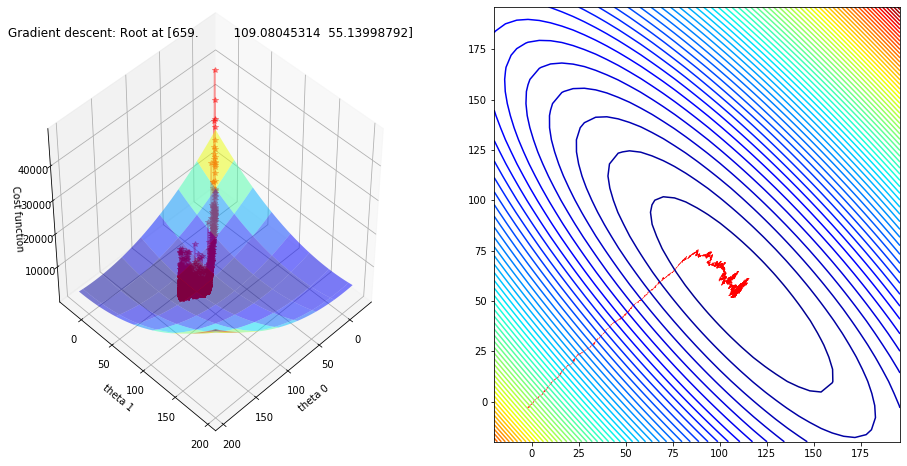

In [153]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Angles needed for quiver plot
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0,theta_1,J_history, marker = '*', color = 'r', alpha = .4, label = 'Stochaistic Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost function')
ax.set_title('Gradient descent: Root at {}'.format(theta_result.ravel()))
ax.view_init(45, 45)


# #Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.show()